In [1]:
%cd ..

d:\HUST\20232\ML\Project_OCR\HandwritingRecognition


In [2]:
from dataset_v2 import DatasetImg_v2

c:\Users\tandat17z\anaconda3\envs\env_tandat17z\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset = DatasetImg_v2('data/train/img', 'data/train/label', scale = 1)

In [4]:
len(dataset)

14808

In [5]:
img, label = dataset[14807%4936 + 4936]

In [8]:
img.shape

torch.Size([1, 32, 800])

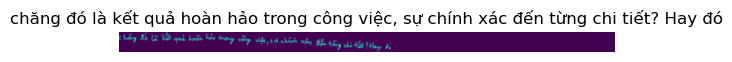

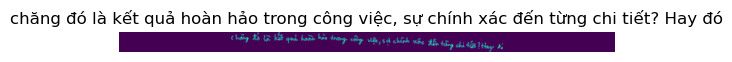

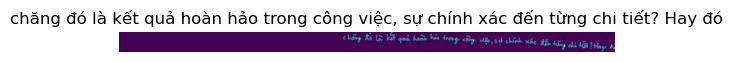

In [7]:
import matplotlib.pyplot as plt

for i in [0, 4936, 4936*2]:
    img, label = dataset[i]
    plt.imshow(img[0])
    plt.title(label)
    plt.axis('off')
    plt.show()

# Dataloader

In [10]:
import torch
train_dataloader = torch.utils.data.DataLoader(
                    dataset,
                    batch_size=64,
                    shuffle=True)

In [15]:
train_dataloader.sampler.num_samples /64

231.375

In [19]:
from tqdm import tqdm

t = tqdm(iter(train_dataloader), total=len(train_dataloader))
for batch_idx, (imgs, labels) in enumerate(t):
    if imgs.shape[-1] != 800: print(imgs, batch_idx)

100%|██████████| 232/232 [00:41<00:00,  5.65it/s]


In [18]:
imgs.shape

torch.Size([64, 1, 32, 800])